In [2]:
#Importacion de las librerias
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from google.colab import drive

In [3]:
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/drive/MyDrive")

/content


# Introduccion

¿Sabías que existen numerosas variedades de pistachos? Dado que cada especie tiene propiedades únicas, reconocer e identificar los pistachos es una técnica altamente práctica.

Algunos pistachos, por ejemplo, son más adecuados para hornear, mientras que otros, que son más crujientes, se consumen generalmente como aperitivos.
En este cuaderno, intentamos predecir qué tipo de pistacho es utilizando los atributos extraídos de las imágenes procesadas.

A continuacion se presenta un dataset con esta informacion, el proposito de este codigo consiste en determinar cual es el mejor un modelo para  clasificar los dos tipos de pistacho.


In [14]:
#Importacion del conjunto de datos
ds = pd.read_csv("pistachio.csv")
ds.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [15]:
#Revision de los datos
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [16]:
ds.shape

(1718, 17)

Se observa que en la base de datos no hay datos nulos. Para realizar el modelo vamos a normalizar la variable Class

In [17]:
ds.Class.value_counts()

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64

# Encoding

Para continuar con el analisis, vamos a convertir los datos de texto en numeros, usando una sencilla clasificacion (1 y 0 para las dos clases)

In [18]:
ds.Class = ds.Class.map({'Kirmizi_Pistachio': 0,'Siit_Pistachio': 1})

In [19]:
ds.Class.value_counts()

0    998
1    720
Name: Class, dtype: int64

Con el dataset organizado, podemos proceder a realizar los modelos.

# Modelos de clasificacion

A continuacion se van a realizar algunos graficos que nos permitan entender mejor el comportamiento de los datos. Compararemos diferentes variables y luego vamos a realizar tres modelos de segmentacion, usando la variale 'Clase' como la variable de clasificacion

In [10]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

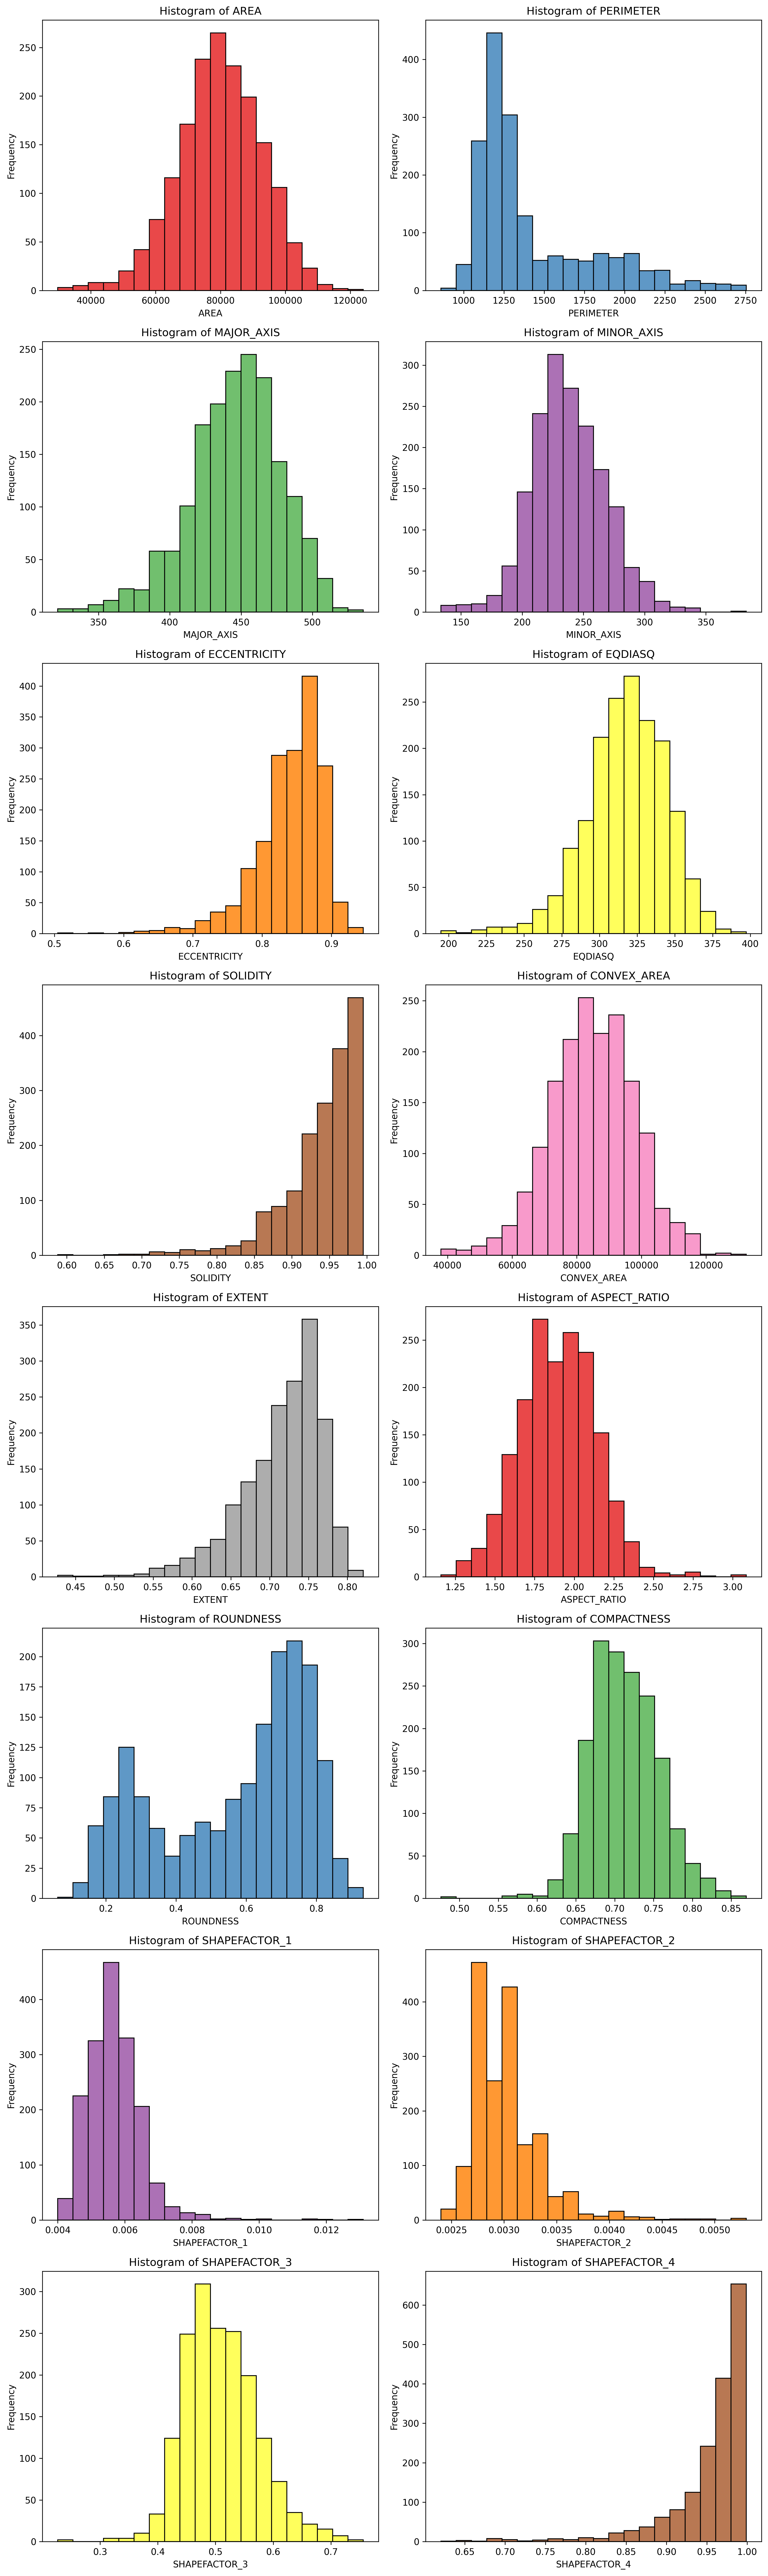

In [21]:
column_to_exclude = 'Class'

all_columns = ds.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 40), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    sns.histplot(data=ds[column], ax=axes[row, col], color=colors[i], alpha=0.8, bins=20)
    axes[row, col].set_ylabel('Frequency', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Histogram of {column}', color=title_color)

    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    fig.subplots_adjust(wspace=0.4)

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

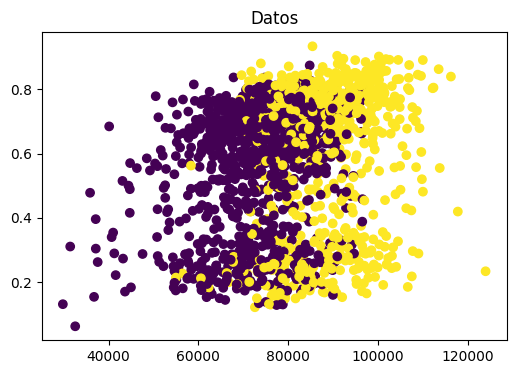

In [30]:
#Visualizacion!
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ds.AREA, ds.ROUNDNESS, c=ds.Class);
ax.set_title("Datos");

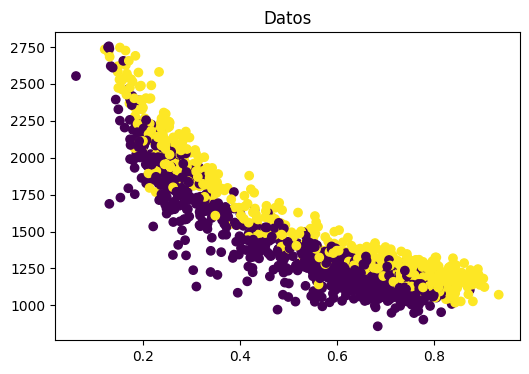

In [31]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ds.ROUNDNESS, ds.PERIMETER, c=ds.Class);
ax.set_title("Datos");

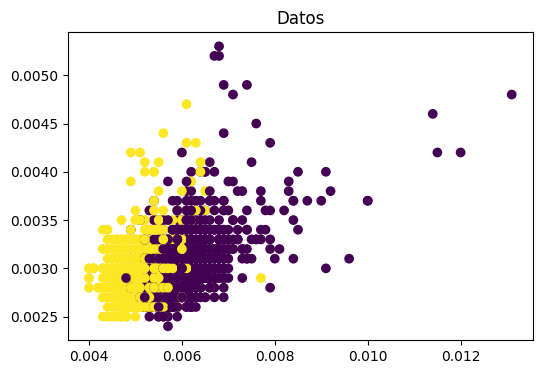

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ds.SHAPEFACTOR_1, ds.SHAPEFACTOR_2, c=ds.Class);
ax.set_title("Datos");

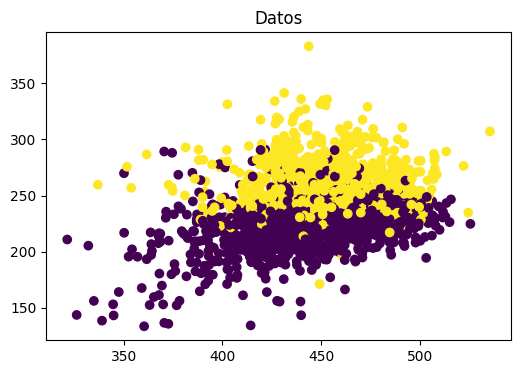

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ds.MAJOR_AXIS, ds.MINOR_AXIS, c=ds.Class);
ax.set_title("Datos");

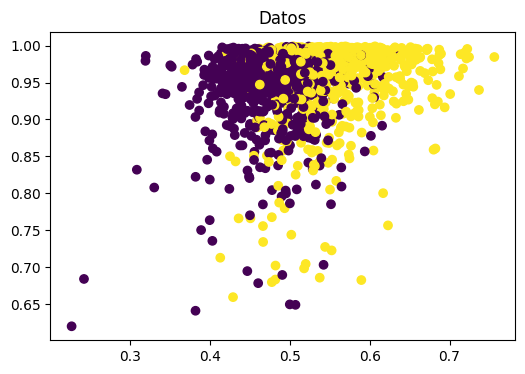

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ds.SHAPEFACTOR_3, ds.SHAPEFACTOR_4, c=ds.Class);
ax.set_title("Datos");

# Primer modelo, SVM

In [36]:
# División de los datos en train y test
X = ds.drop(columns = 'Class') # Matriz de 16 columnas -Variable Independientes
y = ds['Class'] # Vector de 200 filas y 1 columa- Variable Dependiente

In [37]:
 y.values.reshape(-1,1)

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

In [39]:
# Creación del modelo SVM
modelo = SVC(C=0.1,kernel='sigmoid',random_state=42, verbose= True)
modelo.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, kernel='sigmoid', random_state=42, verbose=True)

In [40]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [41]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.5744186046511628


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_test_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       247
           1       0.00      0.00      0.00       183

    accuracy                           0.57       430
   macro avg       0.29      0.50      0.36       430
weighted avg       0.33      0.57      0.42       430



# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [44]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.90       247
           1       0.90      0.82      0.86       183

    accuracy                           0.89       430
   macro avg       0.89      0.88      0.88       430
weighted avg       0.89      0.89      0.89       430



#Conclusiones

De acuerdo a este ejercicio, el mejor modelo seria el random forest, que segun la matriz de confusion, me da una mejor precision en comparacion al modelo de svm